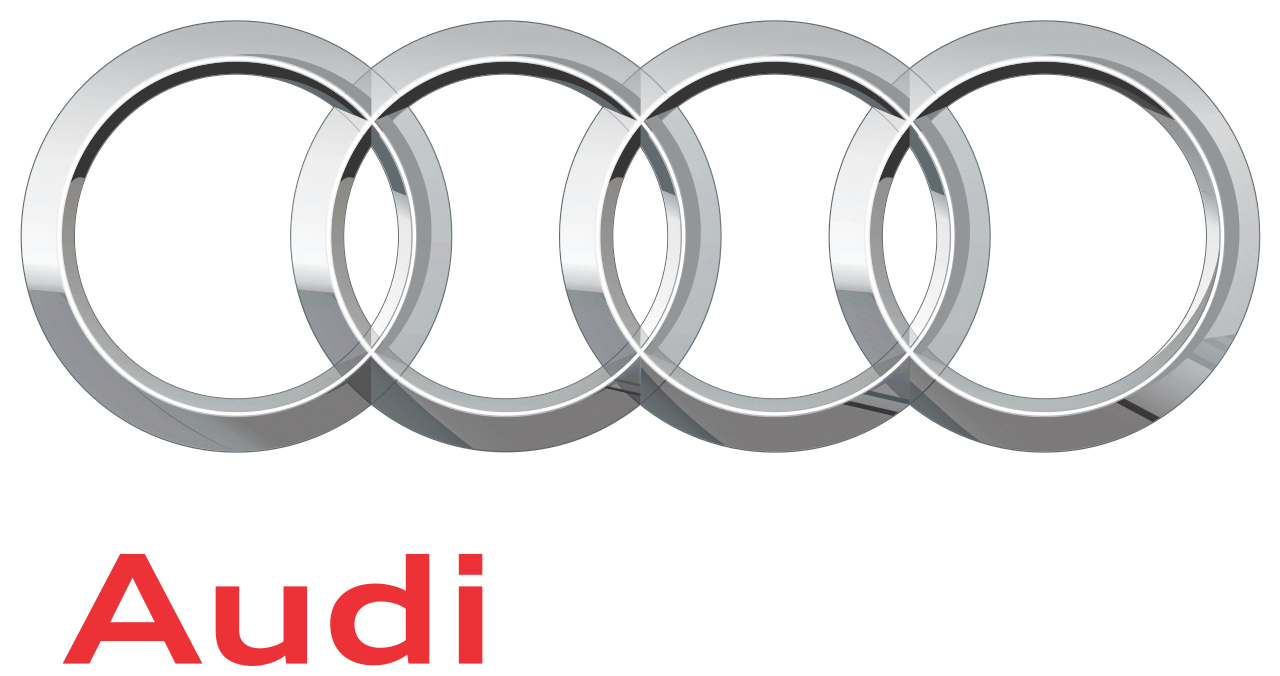

# 4.1 scikit-learn方法

## 4.1.1 导入数据与可视化观测分析

In [2]:
import pandas as pd
# pd.set_option('display.max_rows', None)
audicar=pd.read_csv('audi.csv')
# pd.set_option('expand_frame_repr',False)

audicar.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

In [3]:
audicar['price'].describe(percentiles=[.75, .8])

count     10668.000000
mean      22896.685039
std       11714.841888
min        1490.000000
50%       20200.000000
75%       27990.000000
80%       29990.000000
max      145000.000000
Name: price, dtype: float64

In [4]:
audicar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
audicar.isnull().sum().sort_values(ascending=False)#检查空值并排序

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='frequency'>

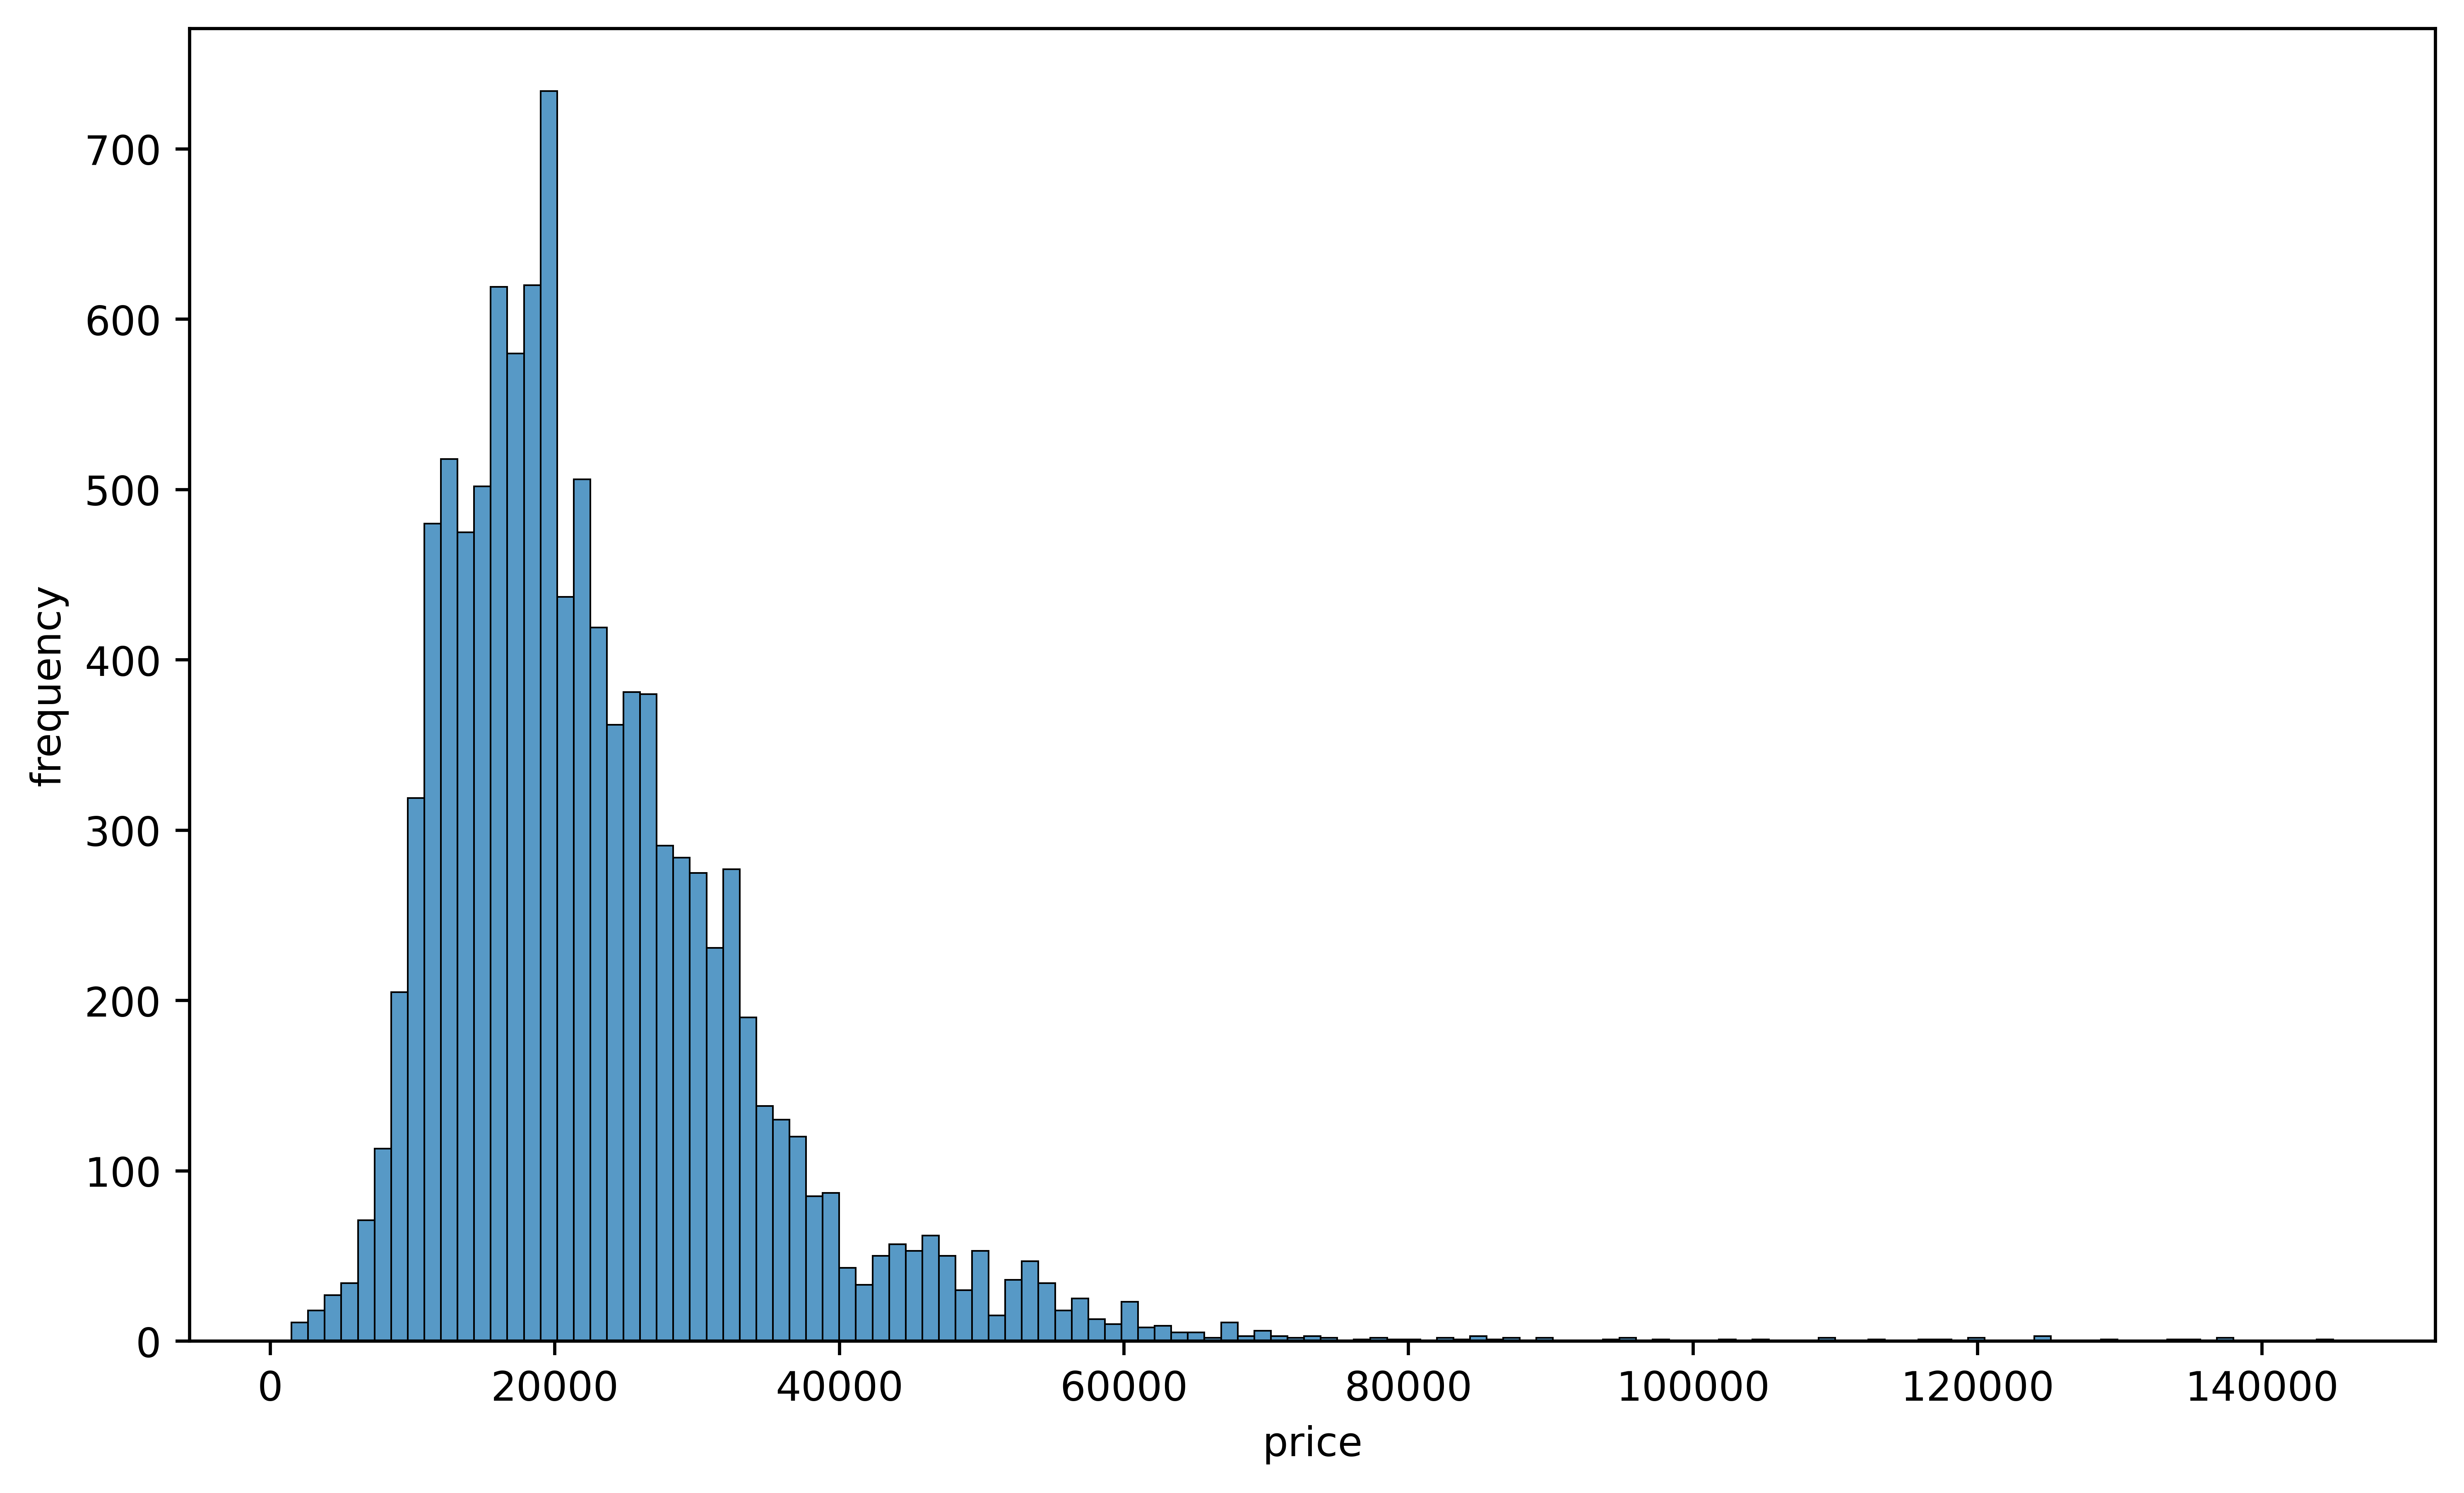

In [10]:
# %matplotlib inline 
import matplotlib.pyplot as plt
import seaborn
plt.figure(figsize=(10,6),dpi=700)
plt.ylabel('frequency')
plt.xlabel('price')
seaborn.histplot(audicar['price'])#频率分布直方图

<AxesSubplot:xlabel='mileage', ylabel='price'>

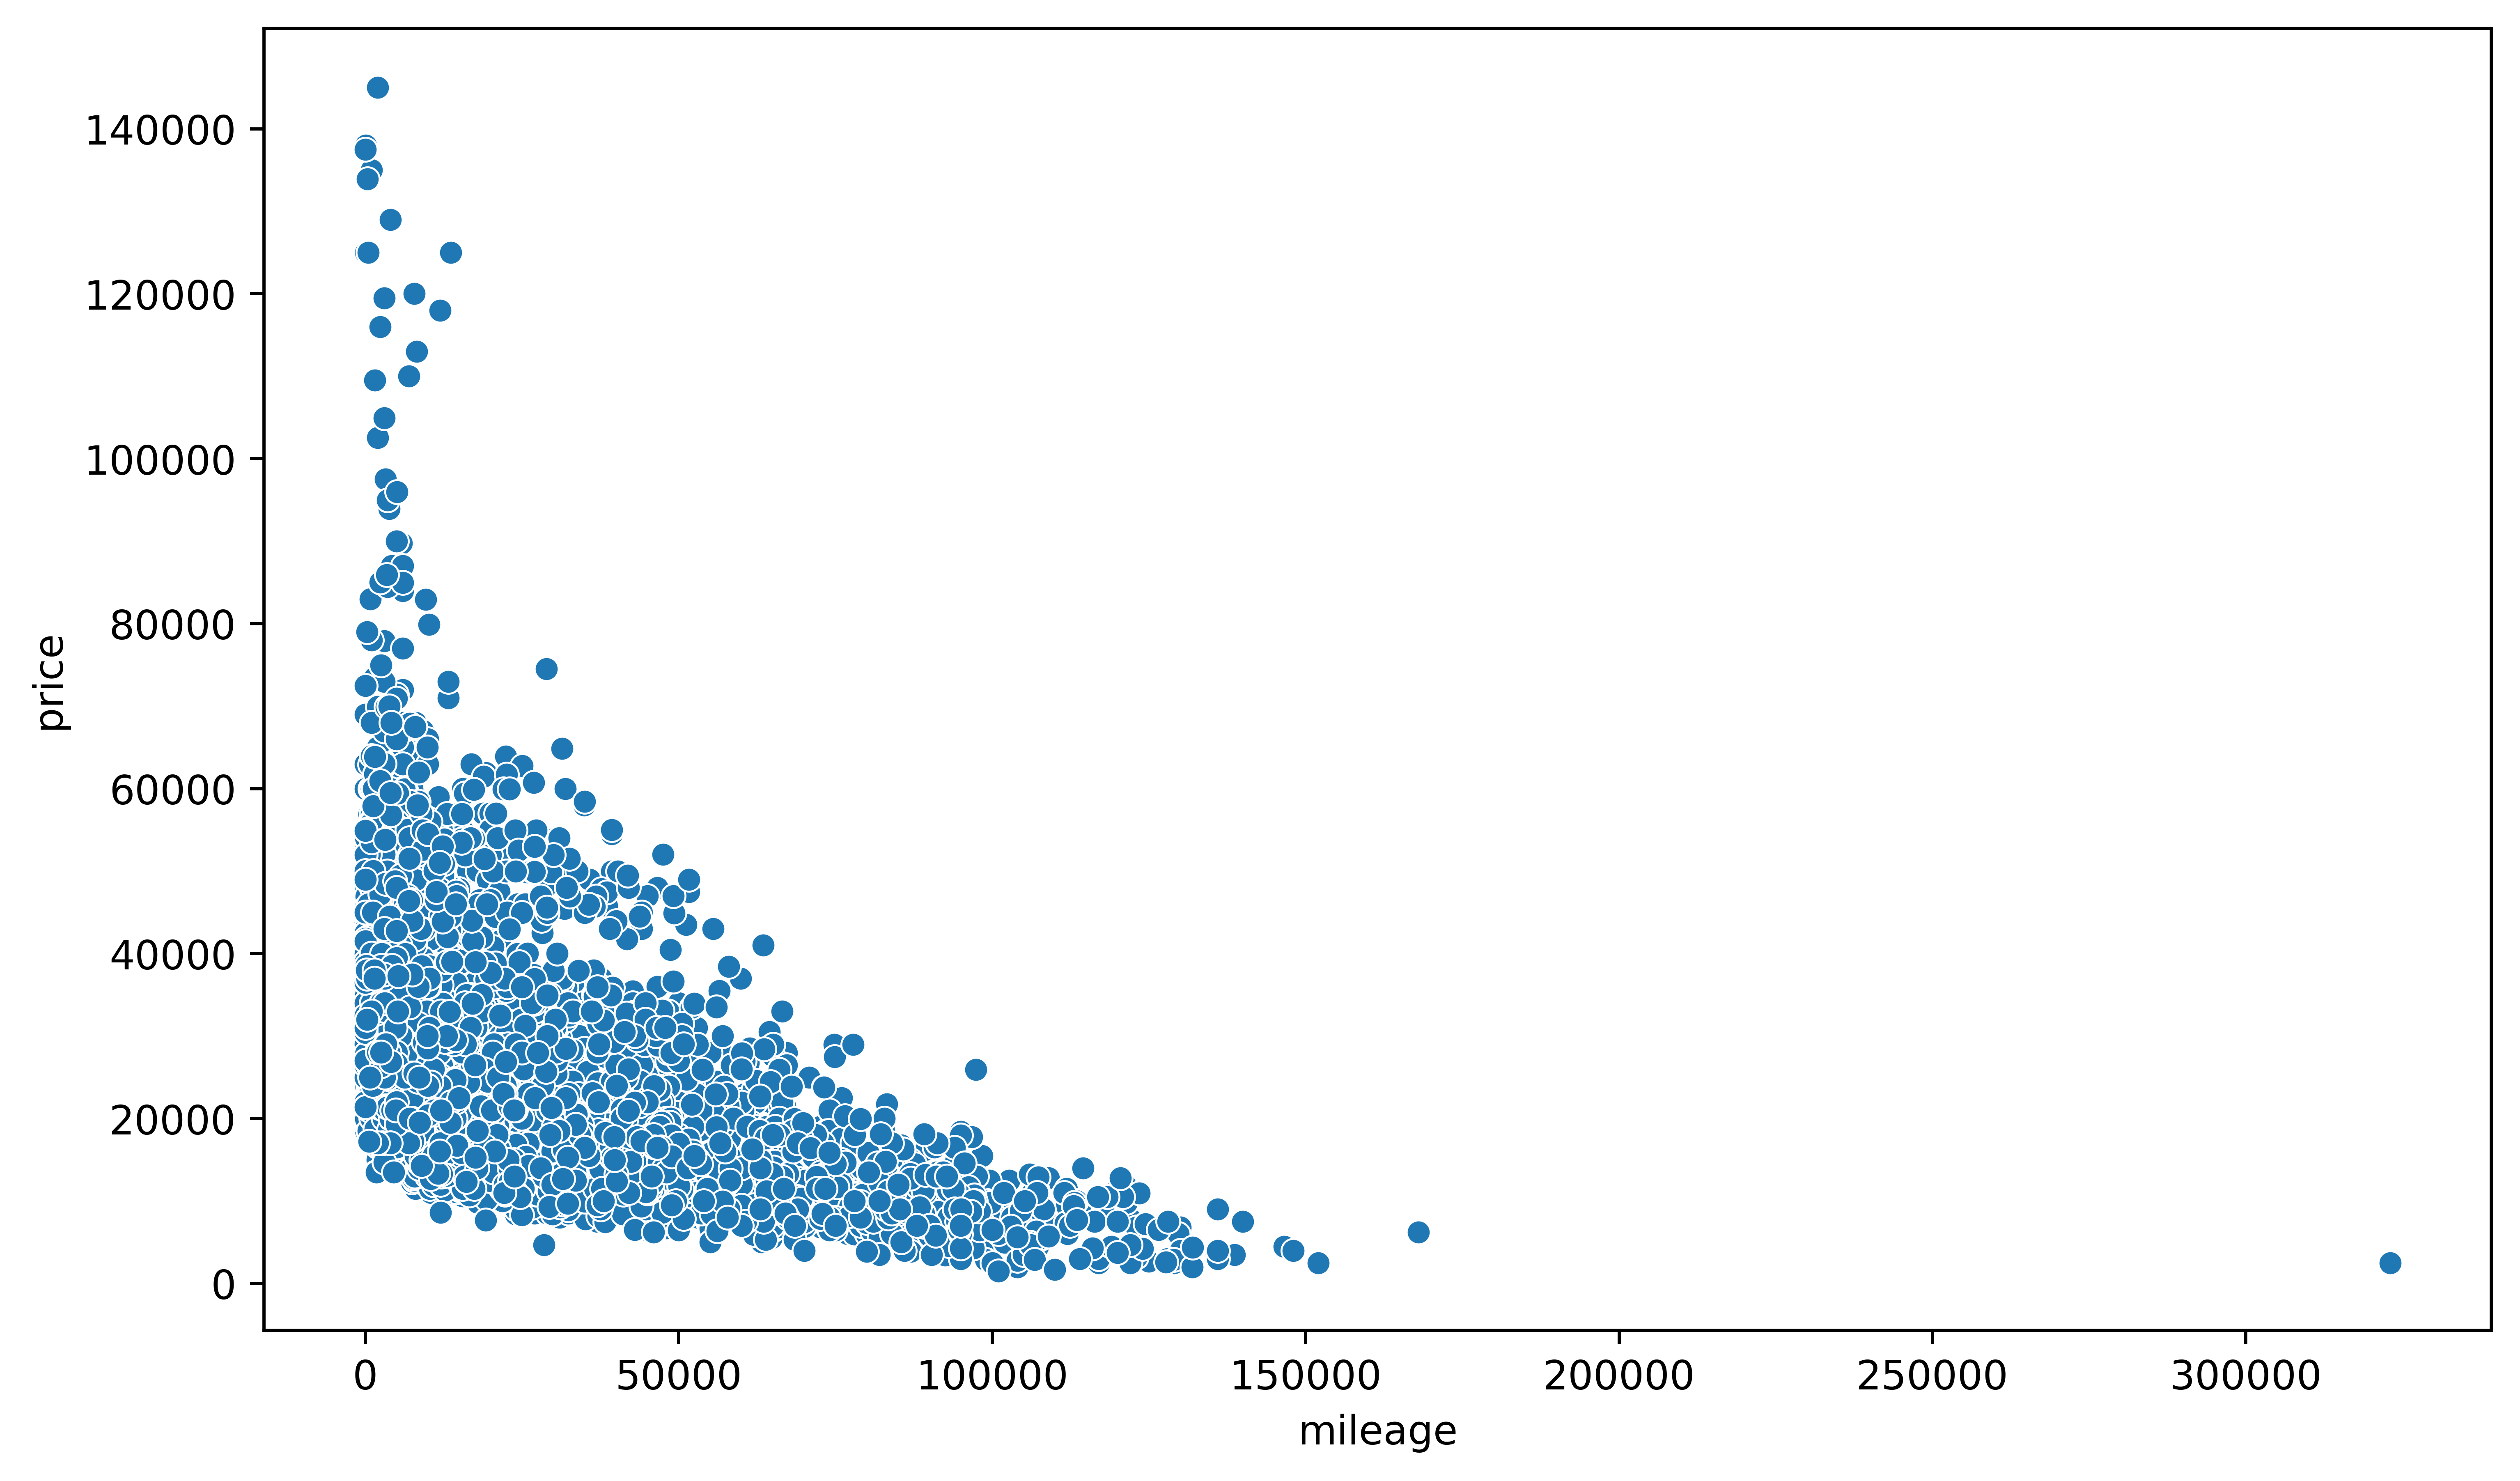

In [11]:
plt.figure(figsize=(10,6),dpi=700)
seaborn.scatterplot(x=audicar['mileage'],y=audicar['price'])

In [12]:
corrmat=audicar.corr()
corrmat

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.592581 -0.789667  0.093066 -0.351281   -0.031582
price       0.592581  1.000000 -0.535357  0.356157 -0.600334    0.591262
mileage    -0.789667 -0.535357  1.000000 -0.166547  0.395103    0.070710
tax         0.093066  0.356157 -0.166547  1.000000 -0.635909    0.393075
mpg        -0.351281 -0.600334  0.395103 -0.635909  1.000000   -0.365621
engineSize -0.031582  0.591262  0.070710  0.393075 -0.365621    1.000000

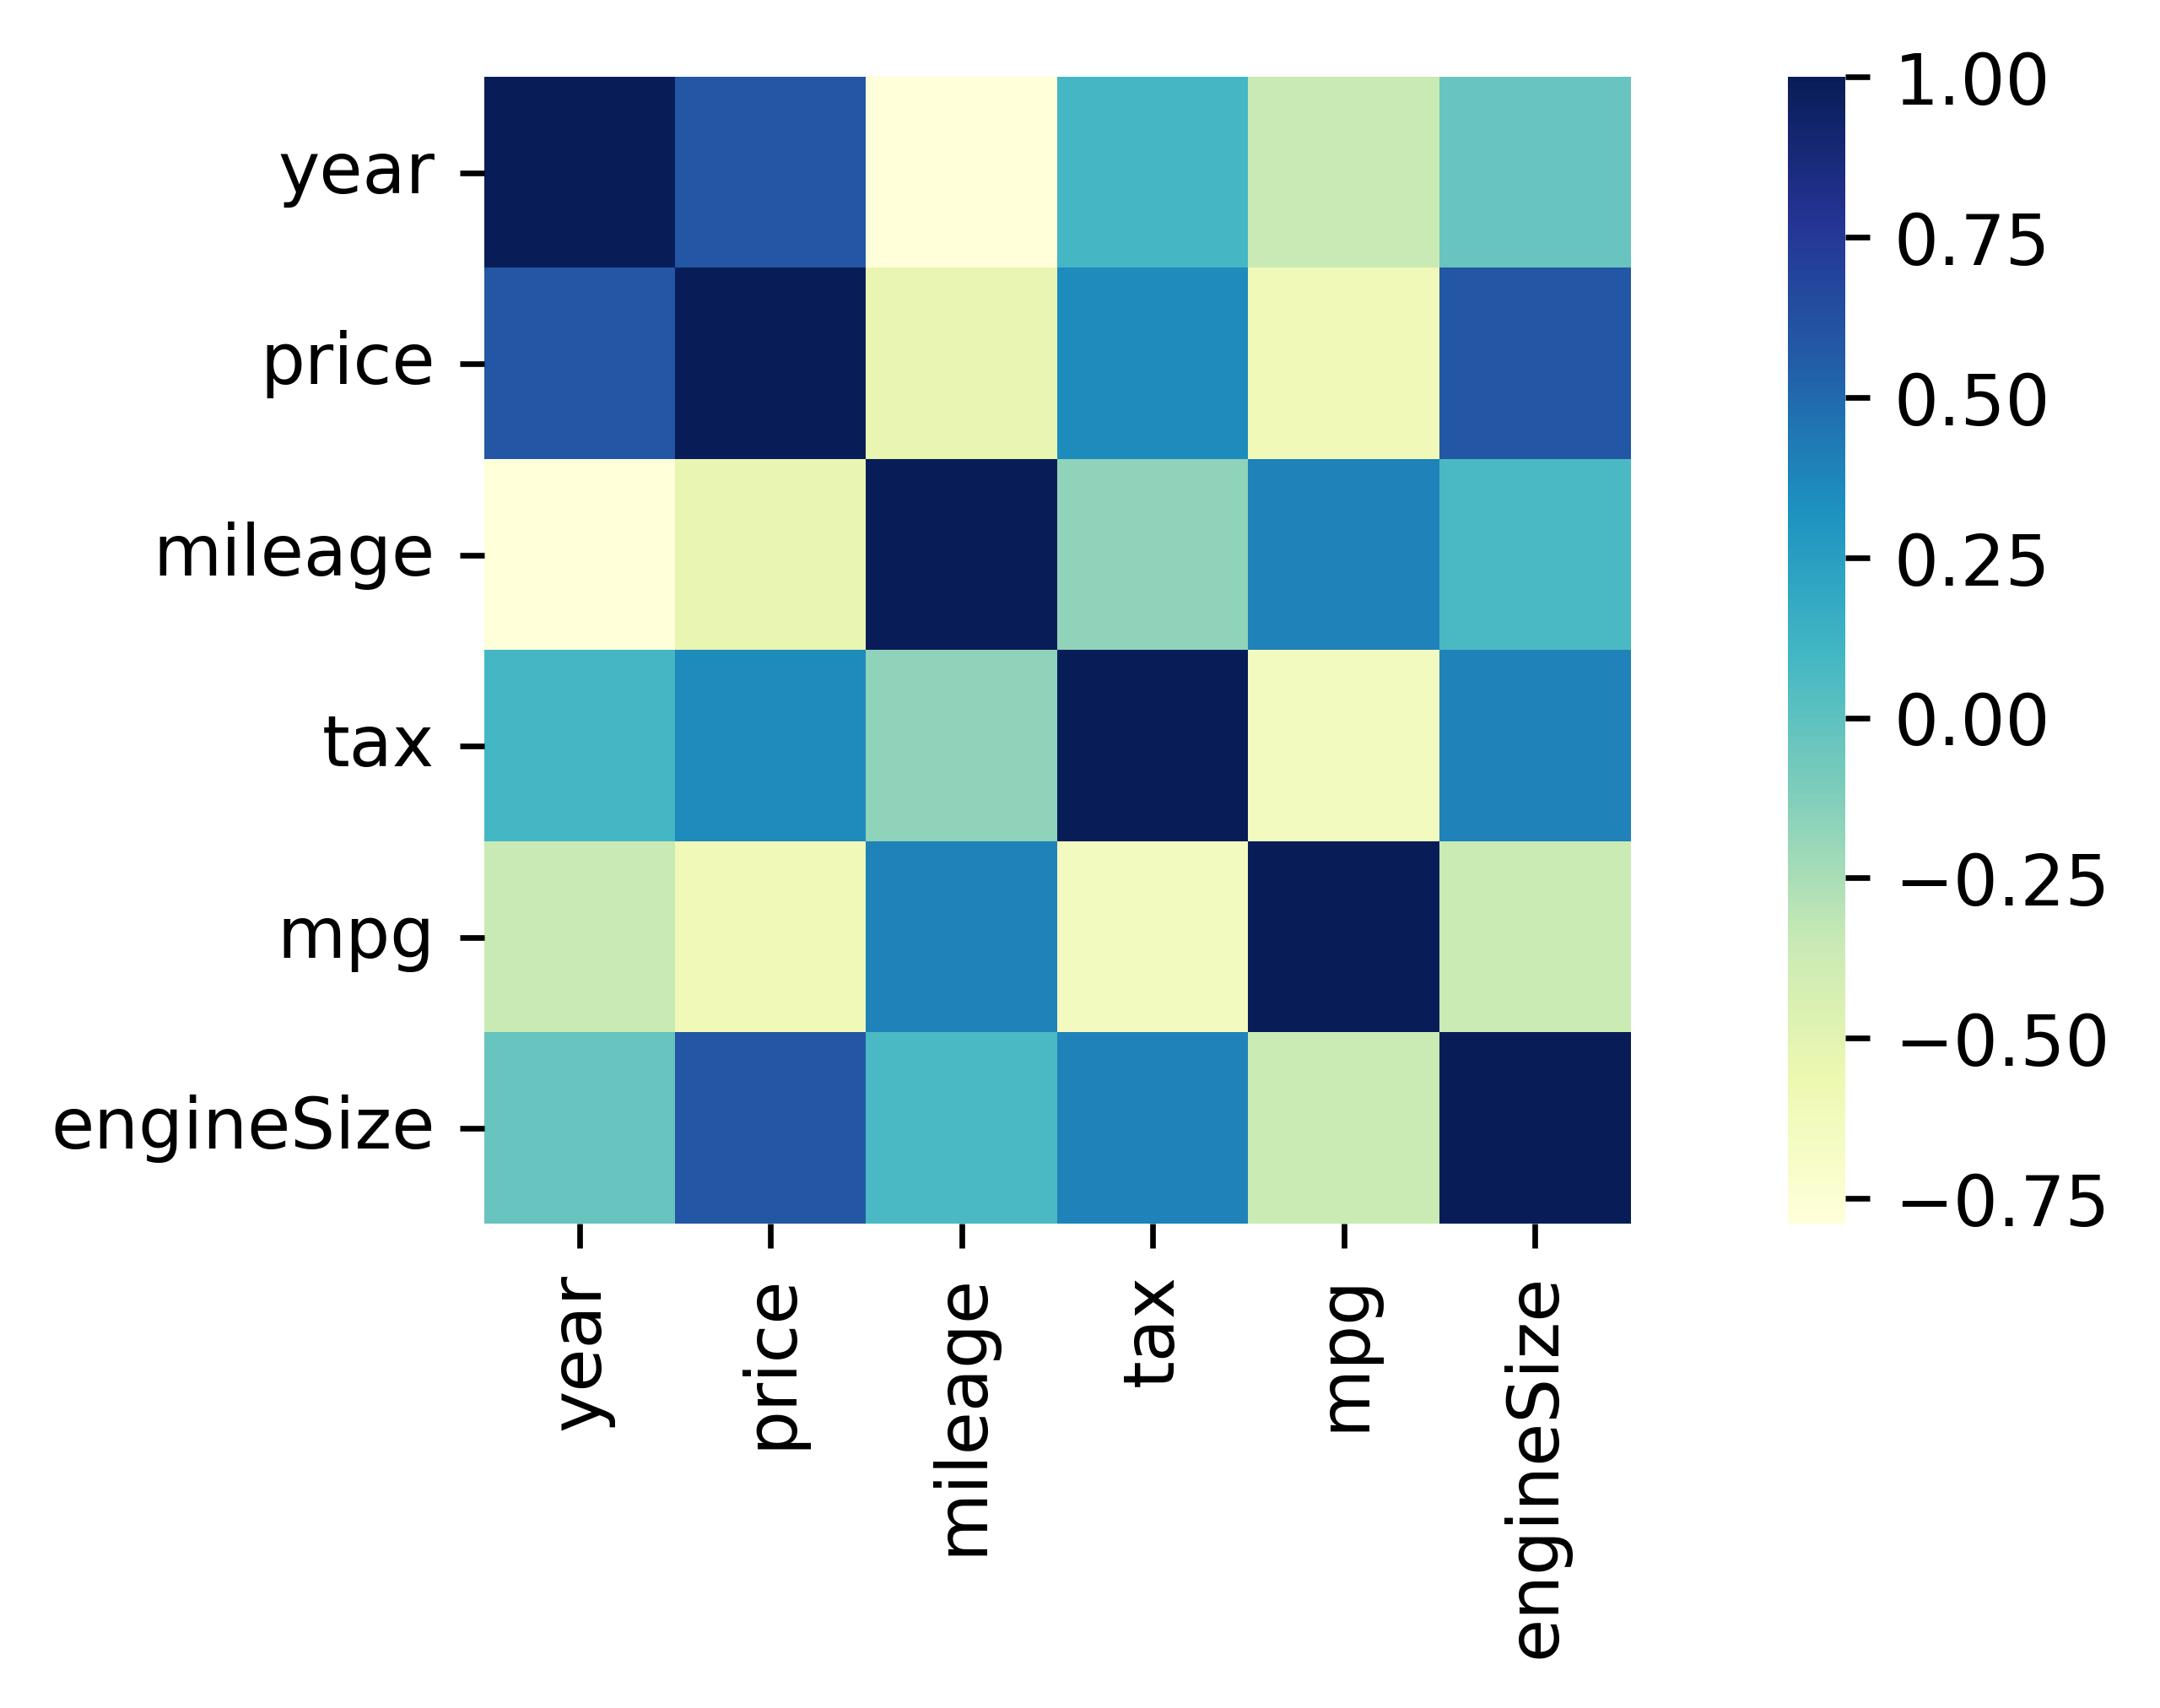

In [13]:
plt.figure(figsize=(8,3),dpi=600)
# plt.rcParams['axes.unicode_minus']=False#解决图像中的符号显示为方框的问题
seaborn.heatmap(corrmat,square=True,cmap="YlGnBu",xticklabels=True)#square为真表明方格子为正方形，cmap代表热力图颜色由黄绿蓝构成
plt.show()

## 4.1.2 数据预处理（features engineering）

In [14]:
audicar.shape

(10668, 9)

In [15]:
audicar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [16]:
print(audicar.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


### onehot方法

In [9]:
data_onehot = pd.get_dummies(audicar,columns=['model', 'transmission','fuelType'])
data_onehot.head()

year  price  mileage  tax   mpg  engineSize  model_ A1  model_ A2  \
0  2017  12500    15735  150  55.4         1.4          1          0   
1  2016  16500    36203   20  64.2         2.0          0          0   
2  2016  11000    29946   30  55.4         1.4          1          0   
3  2017  16800    25952  145  67.3         2.0          0          0   
4  2019  17300     1998  145  49.6         1.0          0          0   

   model_ A3  model_ A4  ...  model_ S8  model_ SQ5  model_ SQ7  model_ TT  \
0          0          0  ...          0           0           0          0   
1          0          0  ...          0           0           0          0   
2          0          0  ...          0           0           0          0   
3          0          1  ...          0           0           0          0   
4          1          0  ...          0           0           0          0   

   transmission_Automatic  transmission_Manual  transmission_Semi-Auto  \
0                       0                    1                       0   
1                       1                    0                       0   
2                       0                    1                       0   
3                       1                    0                       0   
4                       0                    1                       0   

   fuelType_Diesel  fuelType_Hybrid  fuelType_Petrol  
0                0                0                1  
1                1                0                0  
2                0                0                1  
3                1                0                0  
4                0                0                1  

[5 rows x 38 columns]

In [18]:
from sklearn.model_selection import train_test_split
X = data_onehot.drop(['price'],axis=1)
y = data_onehot['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X,y)

0.891637338703445

In [75]:
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(regressor,X_train,y_train,cv=5)
print(cross_score.mean())

0.8908549555913261


In [76]:
import warnings#清除警告
warnings.filterwarnings("ignore")
print('Accuracy on Testing set: %.1f ' %(regressor.score(X_test,y_test)*100))

Accuracy on Testing set: 88.1 


In [77]:
X_train[3:4]

year  mileage  tax   mpg  engineSize  model_ A1  model_ A2  model_ A3  \
9982  2019    10881  145  40.9         1.5          0          0          0   

      model_ A4  model_ A5  ...  model_ S8  model_ SQ5  model_ SQ7  model_ TT  \
9982          0          0  ...          0           0           0          0   

      transmission_Automatic  transmission_Manual  transmission_Semi-Auto  \
9982                       0                    1                       0   

      fuelType_Diesel  fuelType_Hybrid  fuelType_Petrol  
9982                0                0                1  

[1 rows x 37 columns]

In [78]:
y_pred=regressor.predict(X_train[3:4])
y_pred

array([25761.06180355])

In [79]:
y_train[3:4]

9982    24500
Name: price, dtype: int64

In [80]:
results = X_test.copy()
results["predicted"] = regressor.predict(X_test)
results["actual"]= y_test
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(2)
results

predicted  actual
10297   15719.39   14700
4766    29138.28   28990
10248   11833.05   12700
7287    25951.44   22990
8631    19947.08   18950
...          ...     ...
1946    35477.30   30490
4785    13714.66   18490
9990    20263.81   17490
3061    16561.89   13852
5224    23339.70   22950

[2134 rows x 2 columns]

## 4.1.3 数据建模

#### 线性回归 

<div>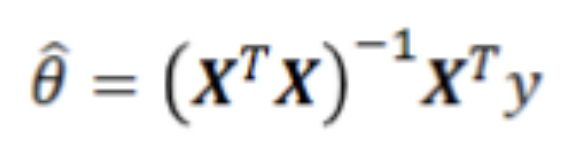</div>

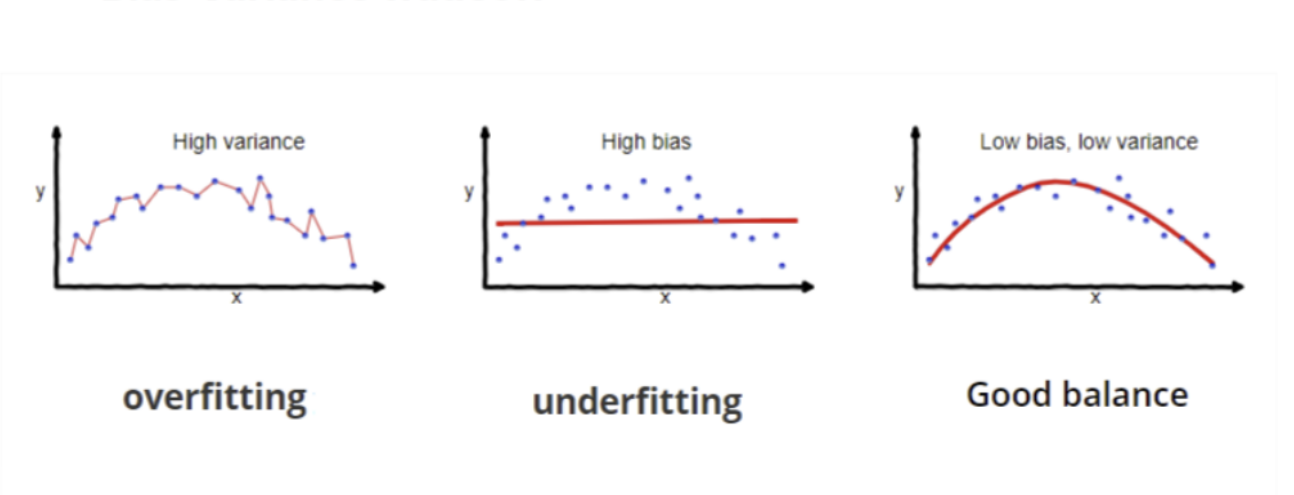

#### Lasso回归

loss函数使用L1范数+RSS(残差平方和),几何解释：

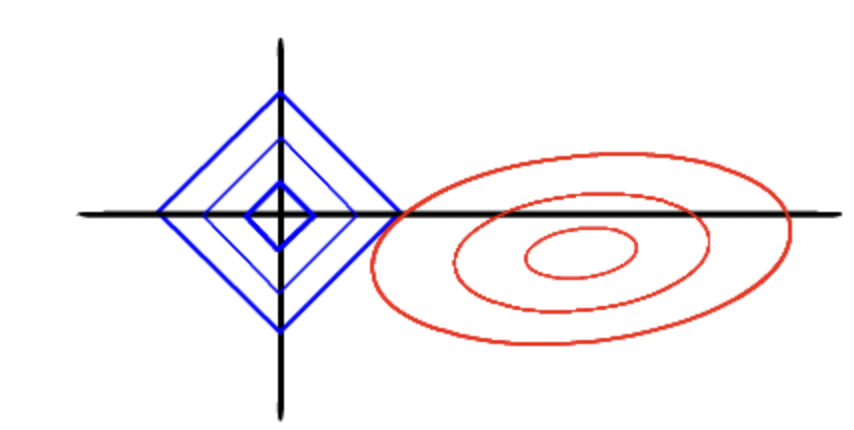

<div>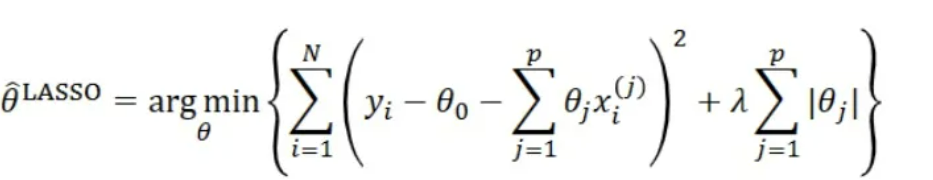</div>

#### 岭回归(Ridge Regression)

loss函数使用L2范数+RSS，几何解释：

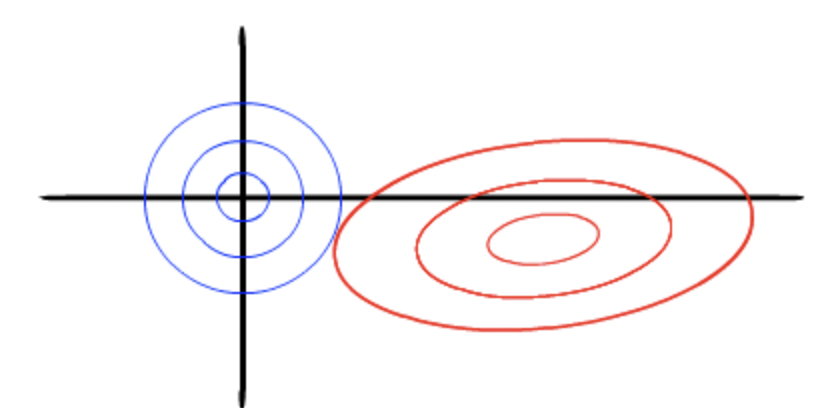

<div>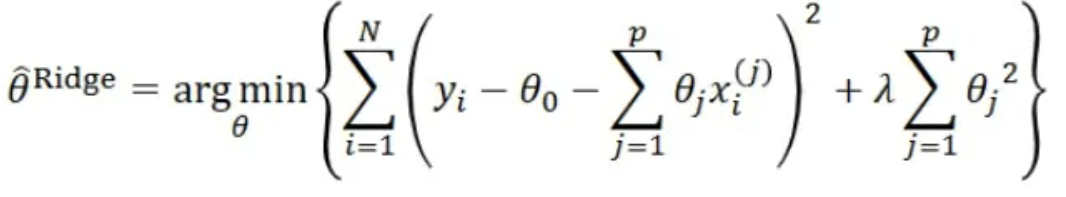</div>

#### 弹性网络ElasticNet

弹性网络ElasticNet是同时使用了系数向量的 L1 范数和 L2 范数的线性回归模型，使得可以学习得到类似于Lasso的一个稀疏模型，同时还保留了 Ridge 的正则化属性，结合了二者的优点，尤其适用于有多个特征彼此相关的场合。

#### 梯度提升回归（GradientBoostingRegressor）、极端梯度提升回归（XGBRegressor）

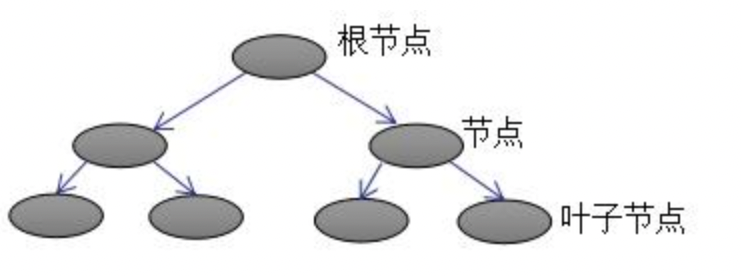

### 建立单模型

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb
from sklearn.base import BaseEstimator, TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split

In [6]:
import sklearn
help(Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso).
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term, controlling regularization
 |      strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.
 |  
 |      When `alpha = 0`, the objective is equivalent to ordinary least
 |      squares, solved by the :class:`LinearR

In [82]:
lasso=Lasso(alpha=0.0005,random_state=0)
print("lasso:",lasso)
ridge=Ridge(alpha=2,max_iter=1000,random_state=1)
print('ridge:',ridge)
ENet=ElasticNet(alpha=0.0005,l1_ratio=0.8,random_state=0)
print("ENet:",ENet)
GBR=GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=4,max_features='sqrt',random_state=0)
print("GBR:",GBR)
#reg_alpha指权重的L1正则化项，reg_lambda指权重L2正则化项。
XGBR=xgb.XGBRegressor(n_estimators=2200,learning_rate=0.05,max_depth=3,reg_alpha=0.4640,reg_lambda=0.8571)
print("XGBR:",XGBR)

lasso: Lasso(alpha=0.0005, random_state=0)
ridge: Ridge(alpha=2, max_iter=1000, random_state=1)
ENet: ElasticNet(alpha=0.0005, l1_ratio=0.8, random_state=0)
GBR: GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          n_estimators=3000, random_state=0)
XGBR: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2200, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


## 4.1.4 模型评估

In [83]:
import warnings#清除警告
warnings.filterwarnings("ignore")
lasso.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(lasso.score(X_test,y_test)*100))

Accuracy on Testing set: 88.1 


In [84]:
ridge.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(ridge.score(X_test,y_test)*100))

Accuracy on Testing set: 87.9 


In [85]:
ENet.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(ENet.score(X_test,y_test)*100))

Accuracy on Testing set: 88.0 


In [86]:
GBR.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(GBR.score(X_test,y_test)*100))

Accuracy on Testing set: 96.8 


In [87]:
XGBR.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(XGBR.score(X_test,y_test)*100))

Accuracy on Testing set: 96.5 


In [88]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train, y_train)
print('Accuracy on Testing set: %.1f ' %(rf_reg.score(X_test,y_test)*100))

Accuracy on Testing set: 96.2 


In [89]:
results = X_test.copy()
results["predicted"] = GBR.predict(X_test)
results["actual"]= y_test
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(2)
results

predicted  actual
10297   15006.52   14700
4766    30994.19   28990
10248   13938.96   12700
7287    24000.38   22990
8631    19334.13   18950
...          ...     ...
1946    34814.68   30490
4785    16567.24   18490
9990    19033.03   17490
3061    13756.89   13852
5224    23731.55   22950

[2134 rows x 2 columns]

### 正态分布转换

C:\Users\shown\AppData\Local\Temp\ipykernel_19696\330195366.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


Skewness: 2.2773230863659157
Kurtosis: 11.671631906714016


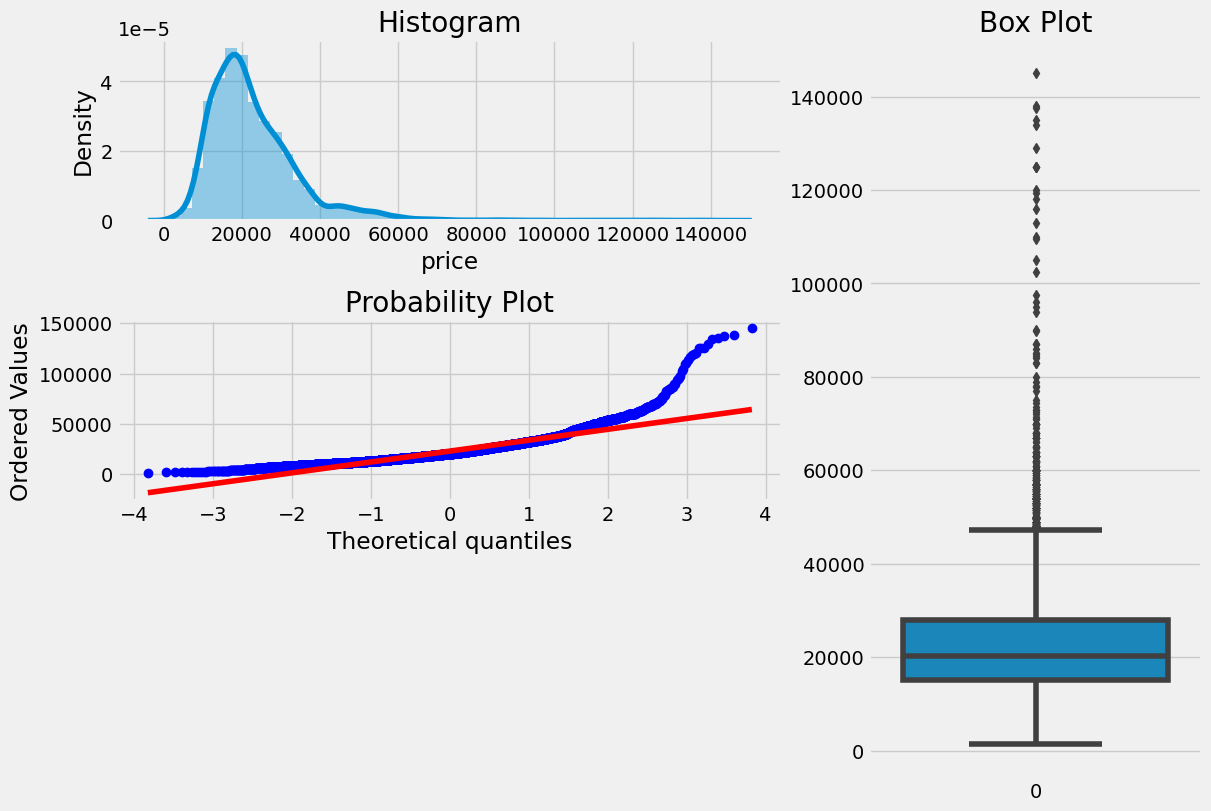

In [6]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(audicar, 'price')
#skewness and kurtosis
print("Skewness: " + str(audicar['price'].skew()))
print("Kurtosis: " + str(audicar['price'].kurt()))

C:\Users\shown\AppData\Local\Temp\ipykernel_19696\330195366.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


Skewness: -0.11474514336603152
Kurtosis: 1.041985854604317


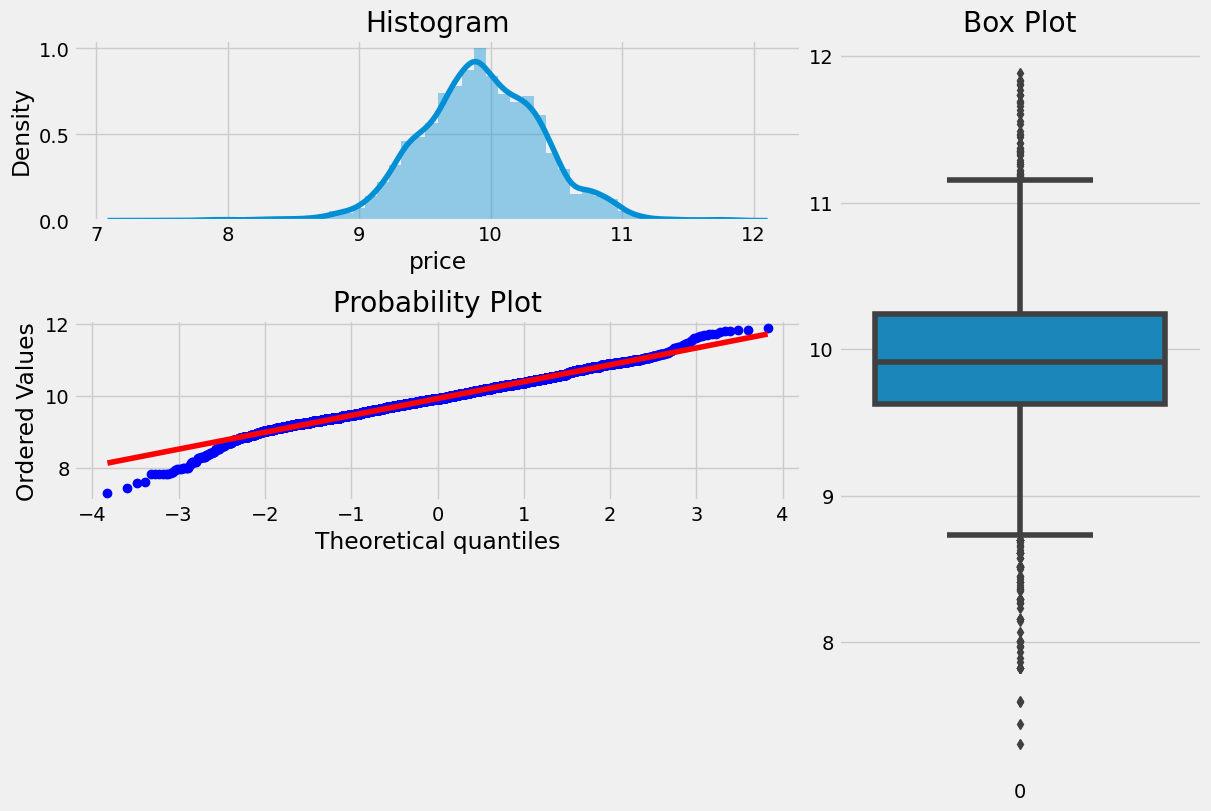

In [10]:
import numpy as np
log_data =  data_onehot.copy()
log_data["price"] = np.log1p(log_data["price"])

## Plotting the newly transformed response variable
plotting_3_chart(log_data, 'price')
#skewness and kurtosis
print("Skewness: " + str(log_data['price'].skew()))
print("Kurtosis: " + str(log_data['price'].kurt()))

In [11]:
from sklearn.model_selection import train_test_split
X = log_data.drop(['price'],axis=1)
y = log_data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [66]:
# Much improved score after adjusting distribution

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(regressor.score(X_test,y_test)*100))

Accuracy on Testing set: 88.1 


In [104]:
import warnings#清除警告
warnings.filterwarnings("ignore")
lasso.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(lasso.score(X_test,y_test)*100))

Accuracy on Testing set: 93.5 


In [105]:
ridge.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(ridge.score(X_test,y_test)*100))

Accuracy on Testing set: 94.0 


In [106]:
ENet.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(ENet.score(X_test,y_test)*100))

Accuracy on Testing set: 93.6 


In [107]:
GBR.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(GBR.score(X_test,y_test)*100))

Accuracy on Testing set: 96.7 


In [108]:
XGBR.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(XGBR.score(X_test,y_test)*100))

Accuracy on Testing set: 96.6 


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train, y_train)
print('Accuracy on Testing set: %.1f ' %(rf_reg.score(X_test,y_test)*100))

Accuracy on Testing set: 96.2 


# 4.2 pytorch

### 不对原数据进行修改

In [45]:
from sklearn.model_selection import train_test_split
import torch
X = data_onehot.drop(['price'],axis=1)
y = data_onehot['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)
dtype = torch.float
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(X_test.values, dtype = dtype)

Y_train_tensor = torch.tensor(y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)
print(X_train_tensor.shape)

torch.Size([8534, 37])


In [47]:
Y_train_tensor.shape

torch.Size([8534])

In [46]:
y_test_tensor.shape

torch.Size([2134])

In [55]:
inp =X_train_tensor.shape[1] 
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

'''nn.Sequential: Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

nn.Linear: Applies a linear transformation to the incoming data: y=Ax+b
parameters:
in_features – size of each input sample out_features – size of each output sample bias – If set to False, the layer will not learn an additive bias. Default: True

Sigmoid : Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))'''

model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out),
)
for iter in range(1100):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor.unsqueeze(1))

    if iter % 100 ==0:
        print(iter, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            

0 661796800.0
100 199293760.0
200 143863952.0
300 137283216.0
400 136499904.0
500 136404592.0
600 136390960.0
700 136386992.0
800 136384176.0
900 136381488.0
1000 136378848.0


In [57]:
y_pred_tensor = model(x_test_tensor )

In [60]:
y_pred_tensor[:20]

tensor([[22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590],
        [22919.9590]], grad_fn=<SliceBackward>)

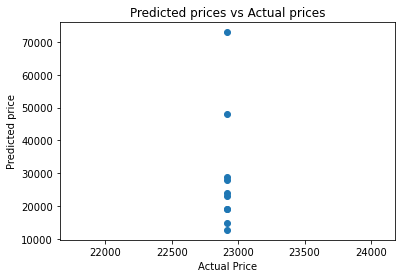

In [69]:
import matplotlib.pyplot as plt
y_pred=y_pred_tensor.detach().numpy()

plt.scatter(y_pred[:10], y_test.values[:10])
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

plt.title("Predicted prices vs Actual prices")
plt.show()

In [70]:
def scorenet(y_pred,y_test):0.00018079129738235444
    score_net= 1-((y_pred-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()
    return score_net
scorenet(y_pred.squeeze(1),y_test)

0.00018079129738235444

### 数据标准化

In [19]:
min_price=audicar['mileage'].min()
max_price=audicar['mileage'].max()
def min_max(x):
    min_max=(x-min_price)/(max_price-min_price)
    return min_max
audicar['mileage']=audicar['mileage'].apply(min_max)
audicar.head()

model  year  price transmission   mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual  0.048712   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic  0.112081   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual  0.092709   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic  0.080344   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual  0.006183   Petrol  145  49.6         1.0

In [20]:
min_price=audicar['tax'].min()
max_price=audicar['tax'].max()
def min_max(x):
    min_max=(x-min_price)/(max_price-min_price)
    return min_max
audicar['tax']=audicar['tax'].apply(min_max)
audicar.head()

model  year  price transmission   mileage fuelType       tax   mpg  \
0    A1  2017  12500       Manual  0.048712   Petrol  0.258621  55.4   
1    A6  2016  16500    Automatic  0.112081   Diesel  0.034483  64.2   
2    A1  2016  11000       Manual  0.092709   Petrol  0.051724  55.4   
3    A4  2017  16800    Automatic  0.080344   Diesel  0.250000  67.3   
4    A3  2019  17300       Manual  0.006183   Petrol  0.250000  49.6   

   engineSize  
0         1.4  
1         2.0  
2         1.4  
3         2.0  
4         1.0

In [21]:
min_price=audicar['mpg'].min()
max_price=audicar['mpg'].max()
def min_max(x):
    min_max=(x-min_price)/(max_price-min_price)
    return min_max
audicar['mpg']=audicar['mpg'].apply(min_max)
audicar.head()

model  year  price transmission   mileage fuelType       tax       mpg  \
0    A1  2017  12500       Manual  0.048712   Petrol  0.258621  0.215466   
1    A6  2016  16500    Automatic  0.112081   Diesel  0.034483  0.267414   
2    A1  2016  11000       Manual  0.092709   Petrol  0.051724  0.215466   
3    A4  2017  16800    Automatic  0.080344   Diesel  0.250000  0.285714   
4    A3  2019  17300       Manual  0.006183   Petrol  0.250000  0.181228   

   engineSize  
0         1.4  
1         2.0  
2         1.4  
3         2.0  
4         1.0

In [22]:
min_price=audicar['year'].min()
max_price=audicar['year'].max()
def min_max(x):
    min_max=(x-min_price)/(max_price-min_price)
    return min_max
audicar['year']=audicar['year'].apply(min_max)
audicar.head()

model      year  price transmission   mileage fuelType       tax       mpg  \
0    A1  0.869565  12500       Manual  0.048712   Petrol  0.258621  0.215466   
1    A6  0.826087  16500    Automatic  0.112081   Diesel  0.034483  0.267414   
2    A1  0.826087  11000       Manual  0.092709   Petrol  0.051724  0.215466   
3    A4  0.869565  16800    Automatic  0.080344   Diesel  0.250000  0.285714   
4    A3  0.956522  17300       Manual  0.006183   Petrol  0.250000  0.181228   

   engineSize  
0         1.4  
1         2.0  
2         1.4  
3         2.0  
4         1.0

In [23]:
data_onehot = pd.get_dummies(audicar,columns=['model', 'transmission','fuelType','engineSize'])
data_onehot.head()

year  price   mileage       tax       mpg  model_ A1  model_ A2  \
0  0.869565  12500  0.048712  0.258621  0.215466          1          0   
1  0.826087  16500  0.112081  0.034483  0.267414          0          0   
2  0.826087  11000  0.092709  0.051724  0.215466          1          0   
3  0.869565  16800  0.080344  0.250000  0.285714          0          0   
4  0.956522  17300  0.006183  0.250000  0.181228          0          0   

   model_ A3  model_ A4  model_ A5  ...  engineSize_2.5  engineSize_2.7  \
0          0          0          0  ...               0               0   
1          0          0          0  ...               0               0   
2          0          0          0  ...               0               0   
3          0          1          0  ...               0               0   
4          1          0          0  ...               0               0   

   engineSize_2.9  engineSize_3.0  engineSize_3.2  engineSize_4.0  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   engineSize_4.1  engineSize_4.2  engineSize_5.2  engineSize_6.3  
0               0               0               0               0  
1               0               0               0               0  
2               0               0               0               0  
3               0               0               0               0  
4               0               0               0               0  

[5 rows x 56 columns]

In [24]:
from sklearn.model_selection import train_test_split
import torch
X = data_onehot.drop(['price'],axis=1)
y = data_onehot['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)
dtype = torch.float
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(X_test.values, dtype = dtype)

Y_train_tensor = torch.tensor(y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)
print(X_train_tensor.shape)

torch.Size([8534, 55])


In [77]:
inp =X_train_tensor.shape[1] 
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

'''nn.Sequential: Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

nn.Linear: Applies a linear transformation to the incoming data: y=Ax+b
parameters:
in_features – size of each input sample out_features – size of each output sample bias – If set to False, the layer will not learn an additive bias. Default: True

Sigmoid : Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))'''

model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out),
)
for iter in range(5100):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(1), Y_train_tensor)

    if iter % 100 ==0:
        print(iter, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            

0 661821632.0
100 145647920.0
200 120217040.0
300 93587680.0
400 83782872.0
500 72643128.0
600 66959576.0
700 62804316.0
800 59034120.0
900 56202628.0
1000 53512428.0
1100 51306656.0
1200 48666900.0
1300 50371036.0
1400 44664936.0
1500 43192504.0
1600 42700432.0
1700 40406548.0
1800 39021236.0
1900 38024536.0
2000 36819328.0
2100 36007260.0
2200 35223028.0
2300 34150844.0
2400 33761348.0
2500 32321788.0
2600 31737660.0
2700 45315584.0
2800 30772022.0
2900 29566238.0
3000 28973334.0
3100 28416816.0
3200 28428568.0
3300 27977708.0
3400 26859450.0
3500 26684242.0
3600 26028374.0
3700 25539492.0
3800 25216360.0
3900 24970772.0
4000 24573040.0
4100 24192476.0
4200 23911808.0
4300 23703744.0
4400 23509626.0
4500 23513362.0
4600 23381714.0
4700 22437106.0
4800 22280580.0
4900 22034564.0
5000 21819580.0


In [78]:
y_pred_tensor = model(x_test_tensor )

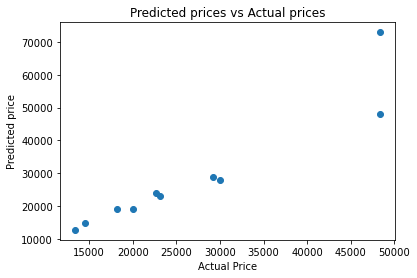

In [79]:
import matplotlib.pyplot as plt
y_pred=y_pred_tensor.detach().numpy()

plt.scatter(y_pred[:10], y_test.values[:10])
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

plt.title("Predicted prices vs Actual prices")
plt.show()

In [80]:
def scorenet(y_pred,y_test):
    score_net= 1-((y_pred-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()
    return score_net
scorenet(y_pred.squeeze(1),y_test)

0.8413208678488588

### 提高迭代次数

In [2]:
inp =X_train_tensor.shape[1] 
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

'''nn.Sequential: Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

nn.Linear: Applies a linear transformation to the incoming data: y=Ax+b
parameters:
in_features – size of each input sample out_features – size of each output sample bias – If set to False, the layer will not learn an additive bias. Default: True

Sigmoid : Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))'''

model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out)
)
for iter in range(8100):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(1), Y_train_tensor)

    if iter % 100 ==0:
        print(iter, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

NameError: name 'X_train_tensor' is not defined

In [132]:
y_pred_tensor = model(x_test_tensor )

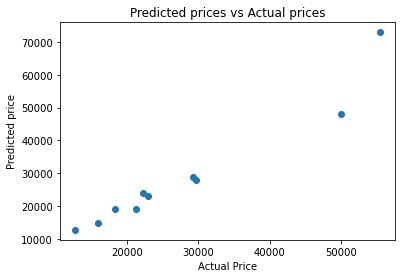

In [133]:
import matplotlib.pyplot as plt
y_pred=y_pred_tensor.detach().numpy()

plt.scatter(y_pred[:10], y_test.values[:10])
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

plt.title("Predicted prices vs Actual prices")
plt.show()

In [134]:
def scorenet(y_pred,y_test):
    score_net= 1-((y_pred-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()
    return score_net
scorenet(y_pred.squeeze(1),y_test)

0.8800266840029836

In [135]:
inp =X_train_tensor.shape[1] 
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

'''nn.Sequential: Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

nn.Linear: Applies a linear transformation to the incoming data: y=Ax+b
parameters:
in_features – size of each input sample out_features – size of each output sample bias – If set to False, the layer will not learn an additive bias. Default: True

Sigmoid : Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))'''

model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out)
)
for iter in range(11100):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(1), Y_train_tensor)

    if iter % 100 ==0:
        print(iter, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 661820672.0
100 145652416.0
200 125560144.0
300 102232776.0
400 93729328.0
500 86106008.0
600 77608864.0
700 70731168.0
800 68133840.0
900 62098004.0
1000 58256492.0
1100 55060336.0
1200 52937384.0
1300 52856224.0
1400 48867236.0
1500 48015484.0
1600 45830052.0
1700 45088152.0
1800 43228432.0
1900 41681604.0
2000 40473800.0
2100 39213132.0
2200 38393484.0
2300 37053024.0
2400 35996500.0
2500 35462040.0
2600 34276552.0
2700 34296984.0
2800 32506532.0
2900 31942002.0
3000 32070286.0
3100 31490582.0
3200 29927368.0
3300 29107352.0
3400 28153744.0
3500 27511252.0
3600 26782654.0
3700 26194756.0
3800 35068692.0
3900 25091884.0
4000 24811244.0
4100 24396328.0
4200 24063360.0
4300 23718008.0
4400 23699072.0
4500 23219402.0
4600 22825578.0
4700 22568744.0
4800 22429384.0
4900 22004602.0
5000 22050568.0
5100 21798184.0
5200 21518372.0
5300 21533342.0
5400 21180560.0
5500 20894594.0
5600 20858026.0
5700 20552418.0
5800 20279520.0
5900 20478682.0
6000 20215652.0
6100 20102570.0
6200 19683420.0


In [136]:
y_pred_tensor = model(x_test_tensor )

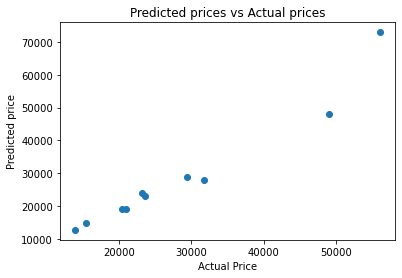

In [137]:
y_pred_tensor = model(x_test_tensor )
import matplotlib.pyplot as plt
y_pred=y_pred_tensor.detach().numpy()

plt.scatter(y_pred[:10], y_test.values[:10])
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

plt.title("Predicted prices vs Actual prices")
plt.show()

In [138]:
def scorenet(y_pred,y_test):
    score_net= 1-((y_pred-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()
    return score_net
scorenet(y_pred.squeeze(1),y_test)

0.8859218992708445

In [25]:
inp =X_train_tensor.shape[1] 
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

'''nn.Sequential: Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

nn.Linear: Applies a linear transformation to the incoming data: y=Ax+b
parameters:
in_features – size of each input sample out_features – size of each output sample bias – If set to False, the layer will not learn an additive bias. Default: True

Sigmoid : Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))'''

model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out)
)
list_iter=[]
list_loss=[]
for iter in range(40000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(1), Y_train_tensor)
    
    if iter % 100 ==0:
        print(iter, loss.item())
        list_iter.append(iter)
        list_loss.append(loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 661821568.0
100 145648704.0
200 118231232.0
300 97770168.0
400 87730312.0
500 82202200.0
600 69432296.0
700 64663476.0
800 60586616.0
900 57508444.0
1000 56877752.0
1100 52541172.0
1200 50532392.0
1300 48404372.0
1400 47608720.0
1500 45030904.0
1600 43522624.0
1700 42360536.0
1800 40860484.0
1900 39968088.0
2000 47845640.0
2100 36798964.0
2200 35648988.0
2300 35174464.0
2400 36877676.0
2500 33364744.0
2600 32683350.0
2700 31842276.0
2800 30932200.0
2900 31224126.0
3000 29915436.0
3100 29241124.0
3200 28568764.0
3300 28340560.0
3400 27681454.0
3500 27226998.0
3600 26301294.0
3700 26140208.0
3800 25508000.0
3900 24888232.0
4000 24590328.0
4100 24493574.0
4200 23886412.0
4300 23684296.0
4400 23657546.0
4500 23267522.0
4600 22789156.0
4700 22275774.0
4800 21989772.0
4900 21711544.0
5000 21583282.0
5100 21761302.0
5200 21368214.0
5300 22858684.0
5400 21075186.0
5500 20820422.0
5600 22815840.0
5700 20680634.0
5800 20441274.0
5900 20487770.0
6000 19765382.0
6100 20259846.0
6200 19507816.0
6

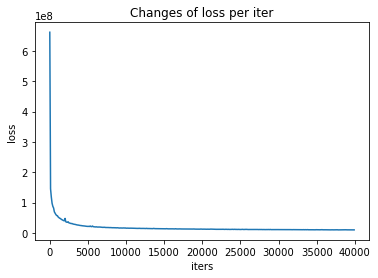

In [28]:
plt.plot(list_iter,list_loss)
plt.xlabel("iters")
plt.ylabel("loss")

plt.title("Changes of loss per iter")
plt.show()

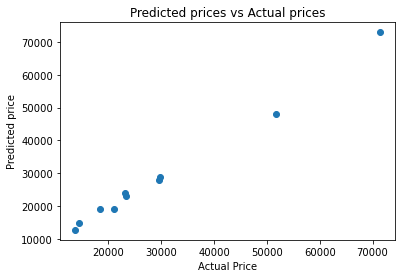

In [30]:
y_pred_tensor = model(x_test_tensor )
y_pred_tensor = model(x_test_tensor )
import matplotlib.pyplot as plt
y_pred=y_pred_tensor.detach().numpy()

plt.scatter(y_pred[:10], y_test.values[:10])
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

plt.title("Predicted prices vs Actual prices")
plt.show()

In [31]:
def scorenet(y_pred,y_test):
    score_net= 1-((y_pred-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()
    return score_net
scorenet(y_pred.squeeze(1),y_test)

0.9201662152261467